# Business Problem

Our Client is a medical company situated in Nairobi,Kenya. Based on the recent outbreak of the Corona Virus and the recent developments which led to the discovery of the vaccine. They want you to use past data on H1N1 influenza virus which is on different people’s backgrounds, opinions, and health behaviors to come up with an algoritm that can predict whether someone got the H1N1 vaccine and with this tehy will get a better understanding of how these characteristics have been associated with personal vaccination patterns may provide guidance for future public health efforts.

# Labels

1. h1n1_vaccine - Whether respondent received H1N1 flu vaccine.

2. seasonal_vaccine - Whether respondent received seasonal flu vaccine.

Both are binary variables: 0 = No; 1 = Yes. Some respondents didn't get either vaccine, others got only one, and some got both. This is formulated as a multilabel (and not multiclass) problem.

# The features in this dataset


You are provided a dataset with 36 columns. The first column respondent_id is a unique and random identifier. The remaining 35 features are described below.

For all binary variables: 0 = No; 1 = Yes.

1. h1n1_concern - Level of concern about the H1N1 flu.
   0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.

2. h1n1_knowledge - Level of knowledge about H1N1 flu.
   0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.

3. behavioral_antiviral_meds - Has taken antiviral medications. (binary)
 
4. behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)

5. behavioral_face_mask - Has bought a face mask. (binary)

6. behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)

7. behavioral_large_gatherings - Has reduced time at large gatherings. (binary)

8. behavioral_outside_home - Has reduced contact with people outside of own household. (binary)

9. behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)

10. doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)

11. doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)

12. chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney   condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)

13. child_under_6_months - Has regular close contact with a child under the age of six months. (binary)

14. health_worker - Is a healthcare worker. (binary)

15. health_insurance - Has health insurance. (binary)

16. opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
    1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

17. opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
    1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

18. opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
    1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

19. opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
    1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.

20. opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
    1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.

21. opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
    1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.

22. age_group - Age group of respondent.

23. education - Self-reported education level.

24. race - Race of respondent.

25. sex - Sex of respondent.

26. income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.

27. marital_status - Marital status of respondent.

28. rent_or_own - Housing situation of respondent.

29. employment_status - Employment status of respondent.

30. hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are  represented as short random character strings.

31. census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.

32. household_adults - Number of other adults in household, top-coded to 3.

33. household_children - Number of children in household, top-coded to 3.

34. employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.

35. employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.

## Load The Data

Below, i will import the relevant libraries for the data analysis and model. I will also load the data.

In [1]:
# Load the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import roc_curve, roc_auc_score

from imblearn.over_sampling import SMOTE

pd.options.display.max_columns = 1000000


The data provided has already been split into the train and test dataset. The target labels for the training data are also stored in a separate dataframes. Therefore i will load the datasets into different data frame with the Features dataframe containing the training data features/independent variables while the Target dataframe will contain our training data target/dependent variable.

In [2]:
# Load the data
Features = pd.read_csv("Data/training_set_features.csv")
Target = pd.read_csv("Data/training_set_labels.csv")

In [3]:
# Load the first 5 rows of the data
Features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
#set the respondent_id as the index
Features.set_index('respondent_id', inplace=True)
Features.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
# Load the first 5 rows of the target data
Target.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [6]:
# set the respondent_id as the index
Target.set_index('respondent_id', inplace=True)
Target.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [7]:
# Load the summary of the Features Dataframe
Features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [8]:
# Load the summary of the Target Dataframe
Target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   h1n1_vaccine      26707 non-null  int64
 1   seasonal_vaccine  26707 non-null  int64
dtypes: int64(2)
memory usage: 625.9 KB


Based on the summary on the two dataframes provided above we can tell that:
1. The features dataframe is made up of 35 columns, most of the columns are of the int and float datatype with some are of the object datatype. The        dataframe has 26707 entiries in each column with some columns contaning null entries.
2. The Target dataframe is made up of 2 columns both of the integer datatype. There are no null entries.

Based on the fact that our business problem is more targeted towards the H1N1 influenza virus vaccine, i will go ahead and drop the seasonal_vaccine target label from the Target Dataframe.

In [9]:
# Drop the 'seasonal_vaccine' column
Target.drop('seasonal_vaccine', axis=1, inplace=True)

In [10]:
# Load the first five columns of the Target DataFrame
Target.head()

,h1n1_vaccine
respondent_id,
0,0
1,0
2,0
3,0
4,0


Below, i will generate the descriptive statistics of the Features dataframe.

In [11]:
# Load the descriptive statistics
Features.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


Based, on the output above we get a statistical summary on the numerical datatype columns in our dataframe providing us with information on the measures such as the columns mean, standard deviation, interquartile range etc. It also provides the minimum and maximum values in each column which will be helpful in identfying the outliers.

## Data Cleaning
In this section we get to clean our data and prepare the for the exploratory analysis and modeling.

### Checking For Null Values
Below i will check the dataframes for null entries and find ways of handling the null entries.

In [12]:
# check the target dataframe for null entries
Target.isna().sum()

h1n1_vaccine    0
dtype: int64

Based on the output above, the Target Dataframe does not contain null entries.

In [13]:
# check the Features dataframe for null entries
Features.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

Based on the output, most of the columns in the Features data frame contain null entries. Below i will do investigate what percentage of the entire dataset does the null entries represent.

In [14]:
# Find what percentage the Null values represent
Features.isnull().sum() * 100 / len(Features)

h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race                            0.000000
sex             

Based on the output, we see that most of the columns contain missing values that represent a percentage that is less than 10 which is really small. However, 4 columns have percentage that is greater than 10 with 'employment_occupation' having a percentage of 50% which is the highest followed closely by 'employment_industry' with 49.91%.

Next i will split the features dataframe into numeric datatype and categorical datatype

In [15]:
numeric_features = Features.columns[Features.dtypes != "object"]

numeric_features = Features[numeric_features]
numeric_features

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0


In [16]:
categorical_features = Features.columns[Features.dtypes == "object"]

categorical_features = Features[categorical_features]
categorical_features

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,NaN,NaN
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",NaN,NaN
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,NaN,NaN
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",NaN,NaN


#### Dealing with the Null Entries
In this section, i will find suitable ways to deal with the null entries in the numeric_features and categorical_features dataframes.

For the numeric features, i will fill the null entries with their respective column median values.

In [17]:
# check for null entries
numeric_features.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
household_adults                 249
household_children               249
dtype: int64

In [18]:
# fill the null entries with the respective column means
numeric_features = numeric_features.fillna(numeric_features.median())

In [19]:
# check for null entries
numeric_features.isna().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_children             0
dtype: int64

From the output above, we have successfully filled our missing values with their respective column means.

Next, for the categorical features, i will fill the missing values with unknown.

In [20]:
# check for null entries
categorical_features.isna().sum()

age_group                    0
education                 1407
race                         0
sex                          0
income_poverty            4423
marital_status            1408
rent_or_own               2042
employment_status         1463
hhs_geo_region               0
census_msa                   0
employment_industry      13330
employment_occupation    13470
dtype: int64

In [21]:
# fill the null entries with unknown
categorical_features = categorical_features.fillna('unknown')

In [22]:
# check for null entries
categorical_features.isna().sum()

age_group                0
education                0
race                     0
sex                      0
income_poverty           0
marital_status           0
rent_or_own              0
employment_status        0
hhs_geo_region           0
census_msa               0
employment_industry      0
employment_occupation    0
dtype: int64

Based on the output above, we have successfully dealt with the caegorical features missing values.

Now using the cleaned numeric_features and categorical_features dataframes, i will mearge the two to create a new dataframe containing the cleaned data

In [23]:
cleaned_Features= pd.merge(numeric_features, categorical_features, on="respondent_id", how='inner')
cleaned_Features

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,unknown,unknown
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",unknown,unknown
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,unknown,unknown
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0,55 - 64 Years,Some College,White,Female,unknown,Not Married,Own,unknown,lzgpxyit,"MSA, Not Principle City",unknown,unknown


### Checking For Duplicates

In this section, i will checked both the "cleaned_features" and "target" dataframes for duplicates and find appropriate ways of tackling them.

In [24]:
# check for duplicates in the cleaned_features dataframe
cleaned_Features.duplicated().sum()

1

In [25]:
# checking the duplicated row
cleaned_Features[cleaned_Features.duplicated()]

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18054,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,55 - 64 Years,Some College,White,Male,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",pxcmvdjn,xgwztkwe


Based on the output, we have only one duplicated row. I will proceed to drop the duplicated entry.

In [26]:
# Drop duplicates
cleaned_Features.drop_duplicates(inplace=True)

In [27]:
# check the target dataframe for duplicates
Target.duplicated().sum()

26705

Based on the output there are about 26705 duplicated values in the target dataframe. This makes sense since the target dataframe is categorical and contains two class label, either 1 or 0. Therefore, i will not drop the duplicated values.

### Checking for Outliers

Here, i'll check the dataset for any outliers.

In [28]:
# LOad the cleaned_features dataset
cleaned_Features.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,unknown,unknown
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",unknown,unknown
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb


In [29]:
# use .describe to get the descriptive statistics
cleaned_Features.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000,26706.000000
mean,1.619861,1.261402,0.048716,0.727777,0.068936,0.825919,0.357485,0.336291,0.678836,0.202501,0.303078,0.272972,0.080057,0.108552,0.934996,3.852917,2.337639,2.352430,4.025650,2.705385,2.115779,0.887553,0.529619
std,0.908979,0.617056,0.215277,0.445113,0.253350,0.379186,0.479268,0.472449,0.466932,0.401871,0.459597,0.445495,0.271386,0.311083,0.246538,1.000061,1.276822,1.353339,1.076992,1.375202,1.319592,0.749994,0.925275
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,2.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


From the data description provided we can tell that almost all our features are in categorical form. Some of them being in binary(0 or 1), ordinal or nominal form. Therefore, looking at the minimum and maximum value in each column they are within the specified range of the respective column categories. 

### Checking features Data types

In [30]:
# Load the feature's dataframe and the dataframe's summary
cleaned_Features.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,unknown,unknown
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",unknown,unknown
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb


In [31]:

cleaned_Features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26706 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26706 non-null  float64
 1   h1n1_knowledge               26706 non-null  float64
 2   behavioral_antiviral_meds    26706 non-null  float64
 3   behavioral_avoidance         26706 non-null  float64
 4   behavioral_face_mask         26706 non-null  float64
 5   behavioral_wash_hands        26706 non-null  float64
 6   behavioral_large_gatherings  26706 non-null  float64
 7   behavioral_outside_home      26706 non-null  float64
 8   behavioral_touch_face        26706 non-null  float64
 9   doctor_recc_h1n1             26706 non-null  float64
 10  doctor_recc_seasonal         26706 non-null  float64
 11  chronic_med_condition        26706 non-null  float64
 12  child_under_6_months         26706 non-null  float64
 13  health_worker   

Based on the output above, the features are assigned correct datatypes.Next, i'll take a look at the target dataset.

In [32]:
# load the target dataframe and the dataframe's summary
Target.head()

,h1n1_vaccine
respondent_id,
0,0
1,0
2,0
3,0
4,0


In [33]:
Target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   h1n1_vaccine  26707 non-null  int64
dtypes: int64(1)
memory usage: 417.3 KB


Based on the output the hini_vaccine column has been assigned the correct datatype.

## Data Exploration.

In this section, i will perform exploratory data analysis on our dataset while coming up with different data visualizations.

### The Distirbution of the Target Labels

Below i will use a countplot to show the distribution of the target labels, but first i will find the value counts for each label.

In [34]:
# load the values count for each label
Target['h1n1_vaccine'].value_counts(normalize=True)

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

Based on the output, it shows that the target class label '0' has more data points with 78% of the data points comming from class '0' while class label '1' has fewer data points with only 21% of the data points representing class '1'. This is a sign of class imbalances in the distibution of the target labels.

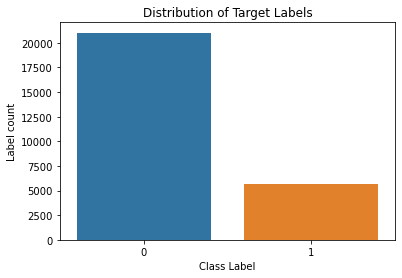

In [35]:
#create the x variable
h1n1_column = Target['h1n1_vaccine']

#create the plot
fig,ax = plt.subplots()

# plot the Graph
ax = sns.countplot(data=Target, x=h1n1_column)

ax.set_title('Distribution of Target Labels')

ax.set_xlabel('Class Label')

ax.set_ylabel('Label count');


The visualization above provides a visual summary of the value counts output. Therefore, 'class 0' has more values than 'class 1' and from the data understanding, we know that 0 means no and 1 means yes. This means that a high percentage of the respondents did not get the H1N1 vaccine with a smaller percentage getting vaccinated.

### The Distribution of the Vaccinated by Sex

Here we are trying to see what percentage of men and women are vavaccinated aganist the parcentage of men and women that are not vaccinated.
We'll start off by creating a new dataframe by merging the cleaned_features dataframe and the Target dataframe.

In [36]:
# create a new dataframe by merging the cleaned_features and target dataframes
data = pd.merge(cleaned_Features, Target, on='respondent_id', how='inner')
# display the first 5 rows of the new dataframe
data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation,h1n1_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,unknown,unknown,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",unknown,unknown,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb,0


In [37]:
# load the summary of the data dataframe.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26706 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26706 non-null  float64
 1   h1n1_knowledge               26706 non-null  float64
 2   behavioral_antiviral_meds    26706 non-null  float64
 3   behavioral_avoidance         26706 non-null  float64
 4   behavioral_face_mask         26706 non-null  float64
 5   behavioral_wash_hands        26706 non-null  float64
 6   behavioral_large_gatherings  26706 non-null  float64
 7   behavioral_outside_home      26706 non-null  float64
 8   behavioral_touch_face        26706 non-null  float64
 9   doctor_recc_h1n1             26706 non-null  float64
 10  doctor_recc_seasonal         26706 non-null  float64
 11  chronic_med_condition        26706 non-null  float64
 12  child_under_6_months         26706 non-null  float64
 13  health_worker   

From the output we have successfully merged the two dataframes and added the 'h1n1_vaccine' column to the dataframe. The H1n1_vaccine columns is the target variable that we'll use to display what percentage of men and women got vaccinate vs those who did not.

Below, i will create a dataframe from by grouping the dataframe by 'sex' and 'h1n1_vaccine'.

In [38]:
# group the data dataset by sex, h1n1_vaccine and compute the sex count
grouped_gender = data.groupby(['sex', 'h1n1_vaccine']).sex.count().unstack()
grouped_gender

h1n1_vaccine,0,1
sex,,
Female,12378,3480
Male,8654,2194


Based on the output, we have successfully grouped the dataset by sex and h1n1_vaccine and gotten the count in terms of gender. From the results we see that the number of unvaccinated women was more than the number of vaccinated women which is the same case for male respondents as most of them were unvaccinated.
(remember 0 represents no and 1 represents yes).

Next, i will plot a grouped bar graph.

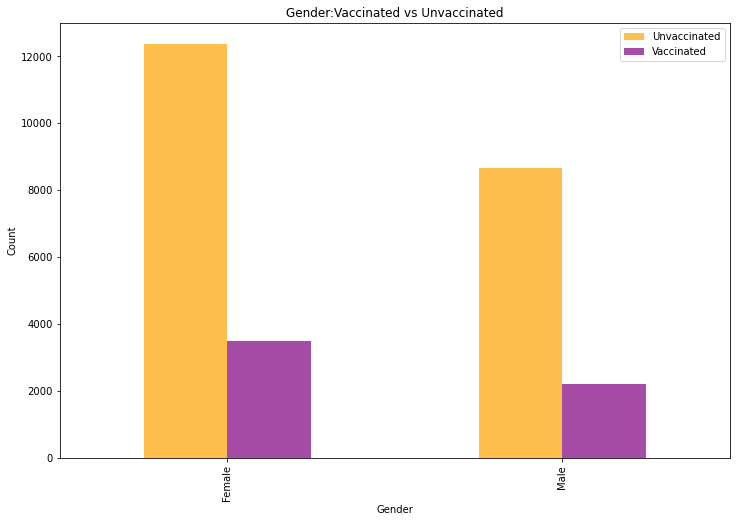

In [39]:
# plot the grouped bar graph

ax = grouped_gender.plot(kind = 'bar', stacked = False, color = ['orange','purple'], alpha = .70, figsize=(12, 8))

ax.set_xlabel('Gender')

ax.set_ylabel('Count')

ax.set_title('Gender:Vaccinated vs Unvaccinated')

ax.legend(['Unvaccinated','Vaccinated']);


The output above gives us a visual summary of the output from the 'grouped_gender' dataframe. From the visual we can see that a higher number of women  were unvaccinated when compared to the number of unvaccinated men and at the same time more women than men got vaccinated.

In [40]:
data['doctor_recc_h1n1'].value_counts()

0.0    21298
1.0     5408
Name: doctor_recc_h1n1, dtype: int64

In [41]:
doctor_recommendation = data.groupby(['doctor_recc_h1n1', 'h1n1_vaccine']).doctor_recc_h1n1.count().unstack()
doctor_recommendation

h1n1_vaccine,0,1
doctor_recc_h1n1,,
0.0,18503,2795
1.0,2529,2879


### The Impact of a Doctors Recommendation when Determining whether to get Vaccinated

Here, we are trying to determine what impact a doctor's recommendation has when determining whether to get vaccinated. First, we'll check the value counts of the 'doctor_recc_h1n1' column that shows the respondents that got a doctor's recommendation and the respondent's that did not.

In [42]:
# load the value counts of the doc and also get what percentage of the actual overall data it represents
print('values:')
print(data['doctor_recc_h1n1'].value_counts())
print()
print('Percentage:')
print(data['doctor_recc_h1n1'].value_counts(normalize=True))

values:
0.0    21298
1.0     5408
Name: doctor_recc_h1n1, dtype: int64

Percentage:
0.0    0.797499
1.0    0.202501
Name: doctor_recc_h1n1, dtype: float64


We get a binary output of 0 and 1 where 0 represents the respondents that did not get a doctors recommendation and 1 represents the respondents that got a doctors recommendation. From the output we see that about 79.7%(21298) of the respondents did not get a doctors recommendation to get vaccinated while about 20.2%(5408) of the respondents got a doctors recommendation to get vaccinated.

Below i will create a new data frame by groping the data by 'doctor_recc_h1n1' and 'h1n1_vaccine'

In [43]:
# Create a dataframe by grouping
doctor_recommendation = data.groupby(['doctor_recc_h1n1', 'h1n1_vaccine']).doctor_recc_h1n1.count().unstack()
doctor_recommendation

h1n1_vaccine,0,1
doctor_recc_h1n1,,
0.0,18503,2795
1.0,2529,2879


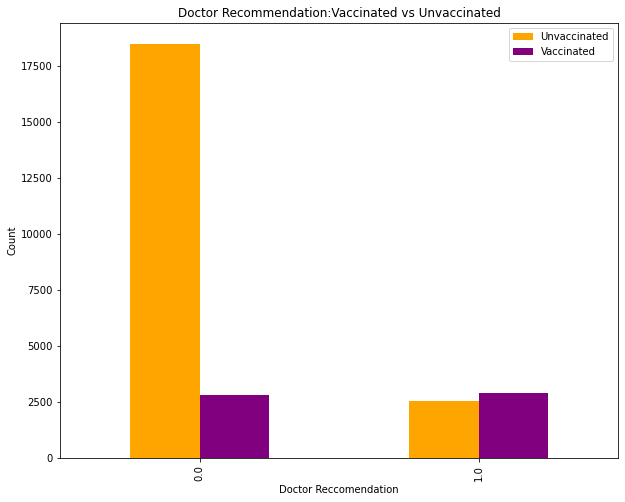

In [44]:
ax = doctor_recommendation.plot(kind = 'bar', stacked = False, color = ['orange','purple'], figsize=(10, 8))

ax.set_xlabel('Doctor Reccomendation')

ax.set_ylabel('Count')

ax.set_title('Doctor Recommendation:Vaccinated vs Unvaccinated')

ax.legend(['Unvaccinated','Vaccinated']);

#ax.legend(loc='center left', box_to_anchor=(1.05, 0.5), title='h1n1_vaccine')

Based on the visual summary above we get to see that, of the patients that got a doctors recomendation(represented by 1) more of them got vaccinated while the rest did not although the difference between the two( vaccinated and unvaccinated) is only slight. Of the patients that did not get a doctors recommendation to get vaccinated more of them did not get vaccinated with the rest getting vacinated, here the difference between the vaccinated and unvaccinated is significantly large.

From this we can see that based on the fact that the difference between the vaccinated and unvaccinated for the respondents that did get a doctors recommendation to get vaccinated is slight, a doctors recommndation has an impact in a respondents decision to get vaccinated on not

## Data Modeling and Evaluation

In this section, we are going to model our data by coming up with different classification models and at the same time also get to evaluate our models.
Remember that at the start of the analysis we were provided with two datasets the train and test datasets. Here we are going to use the Train dataset that contains both the train features and labels and use it as the data that we are going to perform the train-test split on while the Test dataset which we were provided with that contained only the test features will be out unseen data that we are going to test the final model on.


First we are going to perform the train-test split on the data(which contains both the train features and label) dataframe.

In [45]:
# load the data
data

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation,h1n1_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,unknown,unknown,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",rucpziij,xtkaffoo,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",unknown,unknown,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",wxleyezf,emcorrxb,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,unknown,unknown,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",fcxhlnwr,cmhcxjea,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0,55 - 64 Years,Some College,White,Female,unknown,Not Married,Own,unknown,lzgpxyit,"MSA, Not Principle City",unknown,unknown,0


In [46]:
# instantiate the X and Y variables
X = data.drop('h1n1_vaccine', axis=1)
Y = data['h1n1_vaccine']

In the code cell above, i have split the 'data' dataset into X and Y variables. Where X contains our independent variables/predictors and Y contains the target/dependant variable.
Below, i will perform the train-test split of 70% train and 30% test data.

In [47]:
# perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [48]:
print("X_train_shape: ", X_train.shape)
print("X_test_shape: ", X_test.shape)

X_train_shape:  (18694, 35)
X_test_shape:  (8012, 35)


#### Data Preprocessing

Below i will perform the preprocessing of the X_train and X_test data to prepare the data for modeling. First i will perform one hot encoding on the columns with the object datatype for both the X_train dataset first.

In [49]:
# index out the column with the object datatype
X_train_categorical = X_train.select_dtypes('object')

# instantiate the one hot encoder
ohe = OneHotEncoder(drop='first',sparse=False)


# fit and tranform the X_train dataset on the onehotencoder
dummies_train = ohe.fit_transform(X_train_categorical)

# create a dataframe from the encoded columns
dummies_train_df = pd.DataFrame(dummies_train, columns=ohe.get_feature_names(), index=X_train_categorical.index)

Next, i will perform scaling on the columns with the numerical datatype using StandardScaler.

In [50]:
# index out the column with the float datatype
X_train_numerical = X_train.select_dtypes('float64')

# instantaite the standardscaler
scaler = StandardScaler()

#fit and transform the x_train dataset on the scaler
numerical_train_scaled = scaler.fit_transform(X_train_numerical)

# create a new dataframe from the scaled columns
numerical_train_df = pd.DataFrame(numerical_train_scaled, columns=X_train_numerical.columns, index=X_train_numerical.index)
numerical_train_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,,,
2703,0.415666,-0.430093,-0.226468,0.612342,-0.2753,0.459589,1.340927,-0.712447,0.692827,-0.506278,-0.666834,1.619310,3.415452,-0.352009,-3.842164,0.147155,-0.270617,1.202659,-1.905633,1.661777,-0.844510,0.145598,-0.575630
6586,1.519110,-0.430093,-0.226468,0.612342,-0.2753,0.459589,-0.745753,-0.712447,0.692827,-0.506278,-0.666834,1.619310,-0.292787,2.840837,0.260270,0.147155,-0.270617,1.202659,0.903232,0.934526,2.185385,1.482440,-0.575630
13160,1.519110,1.192870,-0.226468,0.612342,-0.2753,0.459589,-0.745753,-0.712447,0.692827,-0.506278,-0.666834,-0.617547,-0.292787,-0.352009,0.260270,-0.853180,-0.270617,-0.269046,-0.033056,0.934526,-0.087036,0.145598,1.576751
2338,-1.791223,1.192870,-0.226468,0.612342,-0.2753,0.459589,1.340927,1.403613,0.692827,1.975200,1.499623,-0.617547,-0.292787,-0.352009,0.260270,1.147491,1.293675,1.202659,0.903232,0.934526,-0.844510,-1.191244,-0.575630
10930,0.415666,-0.430093,4.415632,0.612342,-0.2753,0.459589,-0.745753,1.403613,0.692827,1.975200,1.499623,-0.617547,-0.292787,-0.352009,0.260270,0.147155,-1.052763,-1.004899,-0.033056,-0.519976,-0.844510,1.482440,0.500560


After preparing the X_train for modeling, i will create a new dataframe from the preprocessed columns by merging the dummies_train_df and the numerical_train_df

In [54]:
# create a new dataframe from by merging the dummies_train_df and numerical_train_df

X_train_cleaned = pd.merge(numerical_train_df, dummies_train_df, on='respondent_id', how='inner')


I will perform similar preprocessing steps on the X_test data but instead i'll only transform the X_test data and not fit it

In [55]:
# index out the column with the object datatype
X_test_categorical = X_test.select_dtypes('object')

# transform the X_test dataset on the onehotencoder
dummies_test = ohe.transform(X_test_categorical)

# create a dataframe from the encoded columns
dummies__test_df = pd.DataFrame(dummies_test, columns=ohe.get_feature_names(), index=X_test_categorical.index)

In [56]:
# index out the column with the float datatype
X_test_numerical = X_test.select_dtypes('float64')

# trans form the X_test dataset on the scaler
numerical_test_scaled = scaler.transform(X_test_numerical)

# create a dataframe from the scaled columns
numerical_test_df = pd.DataFrame(numerical_test_scaled, columns=X_test_numerical.columns, index=X_test_numerical.index)
numerical_test_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,,,
866,-0.687779,-0.430093,-0.226468,0.612342,-0.2753,0.459589,1.340927,1.403613,0.692827,-0.506278,-0.666834,-0.617547,-0.292787,-0.352009,0.26027,0.147155,-1.052763,-0.269046,0.903232,0.934526,-0.844510,-1.191244,-0.575630
25526,1.519110,1.192870,-0.226468,0.612342,-0.2753,0.459589,1.340927,1.403613,0.692827,-0.506278,-0.666834,1.619310,-0.292787,-0.352009,0.26027,-2.853851,-1.052763,-1.004899,0.903232,0.934526,-0.844510,-1.191244,-0.575630
24345,-0.687779,-0.430093,-0.226468,0.612342,-0.2753,-2.175857,1.340927,-0.712447,-1.443361,-0.506278,-0.666834,-0.617547,-0.292787,-0.352009,0.26027,0.147155,-1.052763,-0.269046,-0.033056,-1.247227,2.185385,0.145598,2.652941
17962,0.415666,1.192870,-0.226468,0.612342,-0.2753,0.459589,-0.745753,-0.712447,-1.443361,-0.506278,-0.666834,-0.617547,-0.292787,2.840837,0.26027,1.147491,1.293675,1.202659,0.903232,1.661777,-0.844510,1.482440,0.500560
22632,-1.791223,-0.430093,-0.226468,-1.633073,-0.2753,-2.175857,-0.745753,-0.712447,-1.443361,-0.506278,1.499623,1.619310,-0.292787,-0.352009,0.26027,0.147155,-1.052763,-0.269046,-0.033056,-0.519976,1.427912,1.482440,-0.575630


Below, i will also form a new dataframe from the preprocessed X_test data by merging the dummies_test_df and the numerical_test_df

In [57]:
# create a new dataframe by merging the dummies_test_df and numerical_test_df

X_test_cleaned = pd.merge(numerical_test_df, dummies__test_df, on='respondent_id', how='inner')

#### Dealing with Class Imbalances

